<a href="https://colab.research.google.com/github/kamaluddin14/Nairobi-Transport-Prediction/blob/main/Demand_Prediction_for_Public_Transport_Kamaluddin_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [378]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime 

In [379]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [380]:
dataset= pd.read_csv('/content/drive/MyDrive/uploaded files/train_revised.csv')

In [381]:
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-2017,07:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-2017,07:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-2017,07:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-2017,07:12,Migori,Nairobi,Bus,49


In [382]:
dataset.shape

(51645, 10)

We have 51645 rows and 10 columns.





In [383]:
dataset.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UZUEHCBUSO,10-12-2017,07:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


From above table we are getting the following information: 

1.   We have 2 payment Methods.
2.   In travel_date we have 149 unique days.

1.   We have 2 types of cars and most of them are Bus.









In [384]:
# lets find Dependent variable
dapendent_variable = dataset.groupby(['ride_id'])['seat_number'].count().reset_index()
dapendent_variable.head()


,ride_id,seat_number
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [385]:
# drop Duplicate rows. 
dataset= dataset.drop_duplicates(subset='ride_id')

In [386]:
dataset.shape

(6249, 10)

In [387]:
# Merge our dependent variable with our dataset.
dataset = dataset.merge(dapendent_variable, how="left",on="ride_id")
dataset.head()

,ride_id,seat_number_x,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seat_number_y
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-2017,07:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-2017,07:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-2017,07:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-2017,07:12,Migori,Nairobi,Bus,49,31


In [388]:
# renaming columns.
dataset.rename(columns={'seat_number_x':'seat_number','seat_number_y':'number_of_tickets'},inplace= True)
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-2017,07:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-2017,07:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-2017,07:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-2017,07:12,Migori,Nairobi,Bus,49,31


In [389]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ride_id            6249 non-null   int64 
 1   seat_number        6249 non-null   object
 2   payment_method     6249 non-null   object
 3   payment_receipt    6249 non-null   object
 4   travel_date        6249 non-null   object
 5   travel_time        6249 non-null   object
 6   travel_from        6249 non-null   object
 7   travel_to          6249 non-null   object
 8   car_type           6249 non-null   object
 9   max_capacity       6249 non-null   int64 
 10  number_of_tickets  6249 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 585.8+ KB


We have no null values.

# **EDA**

### Let's create some plots to understand our data.

In [390]:
dataset.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'number_of_tickets'],
      dtype='object')

In [391]:
features =['payment_method', 'car_type',
       'max_capacity']

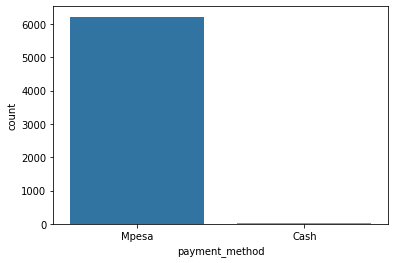

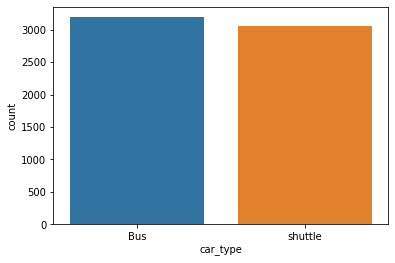

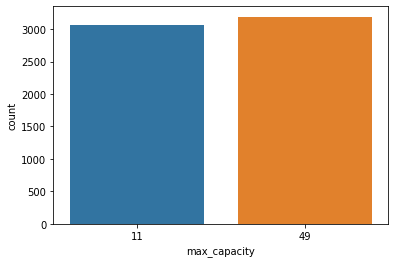

In [392]:
for col in features:
  sns.countplot(dataset[col])
  plt.show()
   

Observations:

1.   List item
2.   List item



In [393]:
# parameters for pie chart.
traffic_from = dataset['travel_from'].value_counts().index
traffic_from_val = dataset['travel_from'].value_counts().values

([<matplotlib.patches.Wedge at 0x7fbc71963090>,
 [Text(-0.33106608034845963, 1.0489972595020005, 'Kisii'),
  Text(-0.5281552579411196, -0.9649103707128189, 'Rongo'),
  Text(0.3284578414537751, -1.0498168632611724, 'Kijauri'),
  Text(0.8537698201922337, -0.6935972131784565, 'Migori'),
  Text(1.0731974145629897, -0.2413447935533614, 'Homa Bay')],
 [Text(-0.18058149837188706, 0.5721803233647275, '59.73%'),
  Text(-0.28808468614970156, -0.5263147476615375, '14.60%'),
  Text(0.17915882261115004, -0.5726273799606394, '11.00%'),
  Text(0.46569262919576376, -0.3783257526427944, '7.63%'),
  Text(0.5853804079434489, -0.13164261466546984, '7.04%')])

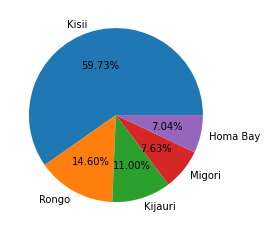

In [394]:
# top 5 places where most people are comming.

plt.pie(traffic_from_val[:5], labels=traffic_from[:5], autopct='%1.2f%%')

Observation: Most people are travelling from Kisii 59.73%, followed by Rango- 14.60%, kijauri-11%, Migori-7.63%, Homa Bay-7.04% etc.

In [395]:
dataset.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'number_of_tickets'],
      dtype='object')

In [396]:
# creating dataframe to analyse Routes.
routes_tickets = dataset.groupby(['travel_from'])['number_of_tickets'].sum().reset_index()
routes_tickets


,travel_from,number_of_tickets
0,Awendo,1788
1,Homa Bay,6304
2,Kehancha,1909
3,Kendu Bay,1
4,Keroka,988
5,Keumbu,22
6,Kijauri,1031
7,Kisii,22607
8,Mbita,378
9,Migori,7027


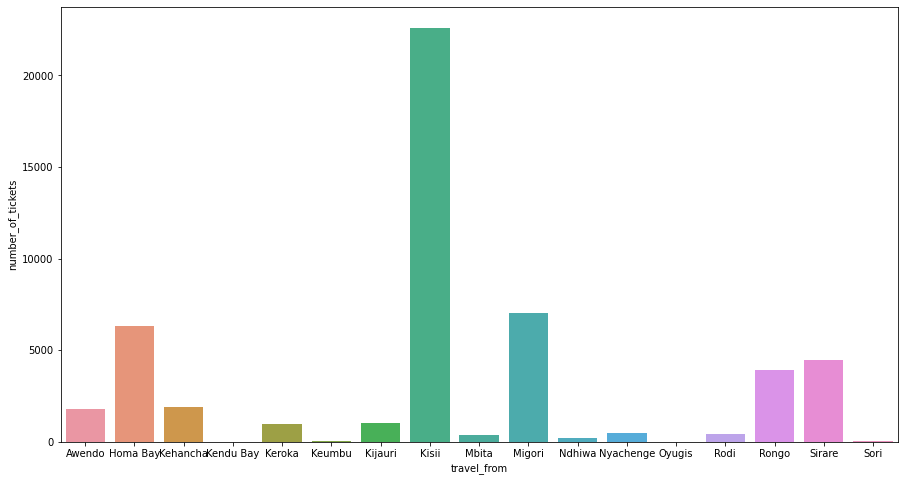

In [397]:
plt.rcParams['figure.figsize']= (15,8)
sns.barplot(x= 'travel_from',y= 'number_of_tickets', data= routes_tickets)

In the above plot we can see the Total number of ticket sold for each Routes.



*   we can see that Kisii has most number of tickets sold.











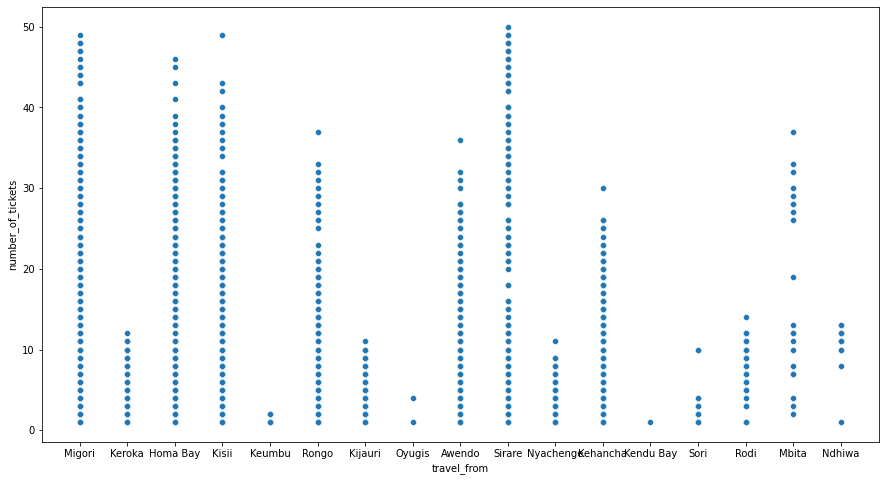

In [398]:
plt.rcParams['figure.figsize']= (15,8)
sns.scatterplot(x= 'travel_from',y= 'number_of_tickets', data= dataset)

In above scatter plot we can see the distribution of number of tickets in different Routes.

# **Feature Engineering** 

In [399]:
#Lets convert  teavel_date and travel_time columns to datetime format.
dataset["travel_date"]=pd.to_datetime(dataset["travel_date"])
dataset['travel_time']=pd.to_datetime(dataset["travel_time"])


In [400]:
#Lets extract the important features from teavel_date and travel_time columns.
dataset["day_of_week"]=dataset["travel_date"].dt.dayofweek
dataset["day_of_year"]=dataset["travel_date"].dt.dayofyear
dataset["day_of_month"]=dataset["travel_date"].dt.day
dataset["is_weekend"]=dataset["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
dataset["hour"]=dataset["travel_time"].dt.hour
dataset["minute"]=dataset["travel_time"].dt.minute

In [401]:
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,day_of_week,day_of_year,day_of_month,is_weekend,hour,minute
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2022-05-29 07:15:00,Migori,Nairobi,Bus,49,1,1,290,17,0,7,15
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2022-05-29 07:12:00,Migori,Nairobi,Bus,49,1,6,323,19,1,7,12
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2022-05-29 07:05:00,Keroka,Nairobi,Bus,49,1,6,330,26,1,7,5
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2022-05-29 07:10:00,Homa Bay,Nairobi,Bus,49,5,0,331,27,0,7,10
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,2022-05-29 07:12:00,Migori,Nairobi,Bus,49,31,0,331,27,0,7,12


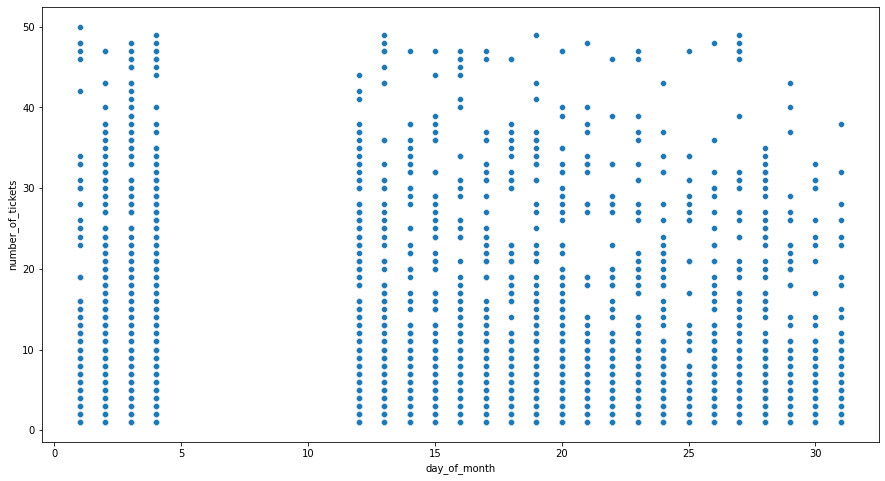

In [402]:
#scatter plot to understand day of month relation with number of tickets.
plt.rcParams['figure.figsize']= (15,8)
sns.scatterplot(x=dataset['day_of_month'],y= dataset['number_of_tickets'])

Observation

*   We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are same.



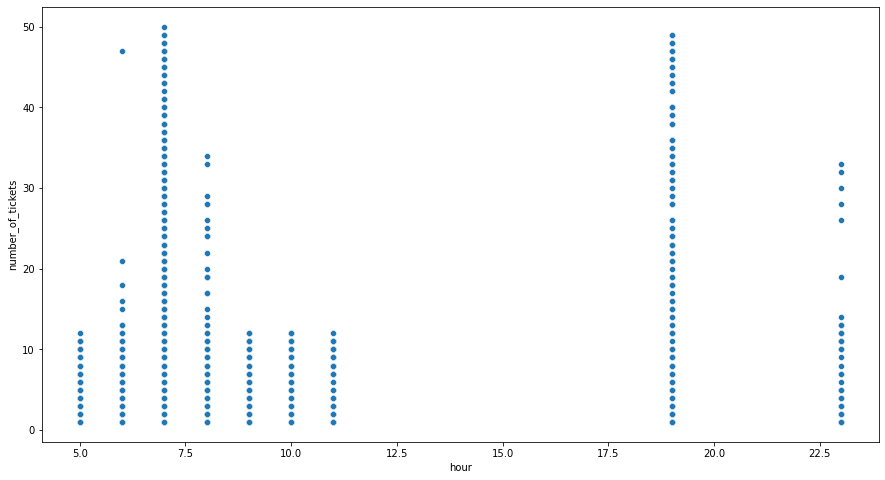

In [403]:
#scatter plot to understand hour relation with number of tickets.
plt.rcParams['figure.figsize']= (15,8)
sns.scatterplot(x=dataset['hour'],y= dataset['number_of_tickets'])

Observation:

*   We can see that most of the ticktes were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

*   From the above we can say that there is not ride between 12pm to 5.30Pm



### Let's add distance and time taken column in our dataset using Google Maps.

In [404]:
#calculating distance between two points using google maps.
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
dataset["distance"]=dataset.travel_from.map(distance)

In [405]:
#calculating travel time between two points using google maps.
#  7*60 is converting hours into minutes.
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
dataset["time_taken"]=dataset.travel_from.map(time)

In [406]:
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,day_of_week,day_of_year,day_of_month,is_weekend,hour,minute,distance,time_taken
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2022-05-29 07:15:00,Migori,Nairobi,Bus,49,1,1,290,17,0,7,15,370.0,428
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2022-05-29 07:12:00,Migori,Nairobi,Bus,49,1,6,323,19,1,7,12,370.0,428
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2022-05-29 07:05:00,Keroka,Nairobi,Bus,49,1,6,330,26,1,7,5,280.0,300
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2022-05-29 07:10:00,Homa Bay,Nairobi,Bus,49,5,0,331,27,0,7,10,360.0,420
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,2022-05-29 07:12:00,Migori,Nairobi,Bus,49,31,0,331,27,0,7,12,370.0,428


### lets see correlation of distance, time taken and number of tickets.

In [407]:
corr_columns = dataset[['distance','time_taken','number_of_tickets']]

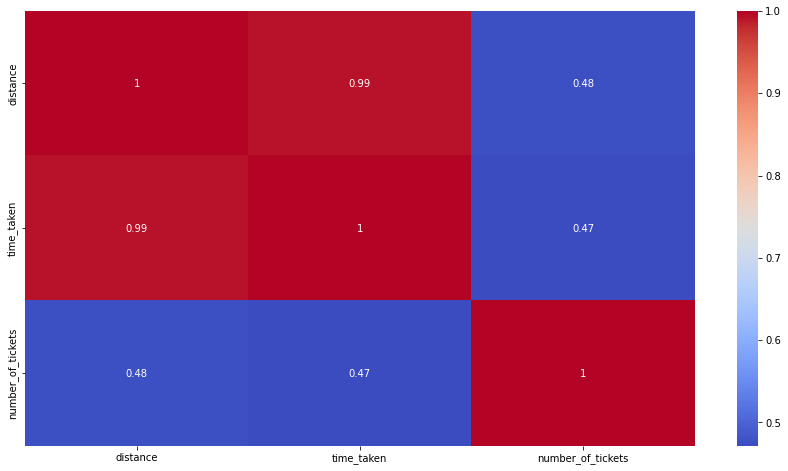

In [408]:
correlation = corr_columns.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We can see that distance and time_taken column have strong **Multicollinearity** with each other. so we have to do something about it.

*   we know that **Speed = Distance/Time** so we will use it and drop distance and time_taken.



In [409]:
# create speed column.
dataset['speed']= dataset['distance']/dataset['time_taken']


In [410]:
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,day_of_week,day_of_year,day_of_month,is_weekend,hour,minute,distance,time_taken,speed
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2022-05-29 07:15:00,Migori,Nairobi,Bus,49,1,1,290,17,0,7,15,370.0,428,0.864486
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2022-05-29 07:12:00,Migori,Nairobi,Bus,49,1,6,323,19,1,7,12,370.0,428,0.864486
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2022-05-29 07:05:00,Keroka,Nairobi,Bus,49,1,6,330,26,1,7,5,280.0,300,0.933333
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2022-05-29 07:10:00,Homa Bay,Nairobi,Bus,49,5,0,331,27,0,7,10,360.0,420,0.857143
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,2022-05-29 07:12:00,Migori,Nairobi,Bus,49,31,0,331,27,0,7,12,370.0,428,0.864486


## **Encoding Categorical features**

In [411]:
dataset = pd.get_dummies(dataset, columns=['travel_from','car_type'], drop_first=True)

In [412]:
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_to,max_capacity,number_of_tickets,day_of_week,...,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2022-05-29 07:15:00,Nairobi,49,1,1,...,0,1,0,0,0,0,0,0,0,0
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2022-05-29 07:12:00,Nairobi,49,1,6,...,0,1,0,0,0,0,0,0,0,0
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2022-05-29 07:05:00,Nairobi,49,1,6,...,0,0,0,0,0,0,0,0,0,0
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2022-05-29 07:10:00,Nairobi,49,5,0,...,0,0,0,0,0,0,0,0,0,0
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,2022-05-29 07:12:00,Nairobi,49,31,0,...,0,1,0,0,0,0,0,0,0,0


In [413]:
linear_data = dataset.copy()

In [414]:
linear_data.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_to', 'max_capacity',
       'number_of_tickets', 'day_of_week', 'day_of_year', 'day_of_month',
       'is_weekend', 'hour', 'minute', 'distance', 'time_taken', 'speed',
       'travel_from_Homa Bay', 'travel_from_Kehancha', 'travel_from_Kendu Bay',
       'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori',
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Oyugis',
       'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare',
       'travel_from_Sori', 'car_type_shuttle'],
      dtype='object')

In [415]:
unnecessary_cols = ['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time','number_of_tickets', 'distance', 'time_taken', 'travel_to']


# **Implementing Linear Regression**

In [416]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math

In [417]:
X= linear_data.drop(unnecessary_cols, axis='columns')
Y= linear_data['number_of_tickets']

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=50)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [419]:
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

In [420]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.40549091764375655
Adjusted r2_score : 0.3974526661246077


In [421]:
# Model score on Train and Test
train_model = reg.score(X_train,y_train)
print('Training Model Score:',train_model)

test_model = reg.score(X_test,y_test)
print('Testing Model Score:',test_model)


Training Model Score: 0.36505166548254997
Testing Model Score: 0.40549091764375655


In [422]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 45.99401689888753
RMSE : 6.7818888887158515
MAE : 4.639995085521409
MAPE : 151.26068499785677


We can see our model performence is not good, Lets try some other models.

# **Implementing Lasso Regression**

In [423]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [424]:
lasso_data = dataset.copy()

In [425]:
#creating dependent and independent variable
X = lasso_data.drop(unnecessary_cols, axis='columns')
Y = lasso_data['number_of_tickets']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state= 0 )

In [426]:
X_test.shape

(1875, 25)

In [427]:
#lasso = Lasso()
alphas = [0.01,0.025, 0.1, 1, 5, 8]
for alpha in alphas:
  lasso = Lasso(alpha=alpha ,max_iter= 1000)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))


alpha:  0.01
test Score:  0.38231551300625943
train Score:  0.37091427255493203
alpha:  0.025
test Score:  0.3736815190218725
train Score:  0.3634813162150705
alpha:  0.1
test Score:  0.344298616400728
train Score:  0.33932011066424816
alpha:  1
test Score:  0.07027212115757242
train Score:  0.0911105540580901
alpha:  5
test Score:  0.04265518629740095
train Score:  0.053725590195874307
alpha:  8
test Score:  0.03733767681252009
train Score:  0.04657556793684137


we can see that alpha = 0.1 is giving us best score.

In [428]:
lasso = Lasso(alpha=0.1 , max_iter= 1000 )
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [429]:
y_pred_train = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [430]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.344298616400728
Adjusted r2_score : 0.33543299466466425


In [431]:
# Model score on Train and Test
train_model = lasso.score(X_train,y_train)
print('Training Model Score:',train_model)

test_model = lasso.score(X_test,y_test)
print('Testing Model Score:',test_model)


Training Model Score: 0.33932011066424816
Testing Model Score: 0.344298616400728


In [432]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 49.50688359933845
RMSE : 7.036112818832459
MAE : 5.006458088107388
MAPE : 181.63723556024522


# **Implementing Ridge Regression**

In [433]:
from sklearn.linear_model import Ridge

In [434]:
ridge_data = dataset.copy()

In [435]:
#creating dependent and independent variable
X= ridge_data.drop(unnecessary_cols, axis='columns')
Y= ridge_data['number_of_tickets']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state= 0 )

In [436]:
alpha = [0.01,0.025, 0.1, 1, 5, 8]
for alpha in alphas:
  ridge = Ridge(alpha =alpha, max_iter= 1000)
  ridge.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',ridge.score(X_test, y_test))
  print('train Score: ',ridge.score(X_train, y_train))

alpha:  0.01
test Score:  0.38457918117558043
train Score:  0.37427458370250954
alpha:  0.025
test Score:  0.38458299036751764
train Score:  0.374274295998009
alpha:  0.1
test Score:  0.384595405334187
train Score:  0.3742697799735236
alpha:  1
test Score:  0.3843968747311659
train Score:  0.3740901112166537
alpha:  5
test Score:  0.38238910750784305
train Score:  0.3730543733136008
alpha:  8
test Score:  0.38066288575152063
train Score:  0.3721866995371551


lets take alpha =1

In [437]:
ridge = Ridge(alpha =1, max_iter= 1000)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=1000)

In [438]:
y_pred_train = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [439]:
# Model score on Train and Test
train_model = ridge.score(X_train,y_train)
print('Training Model Score:',train_model)

test_model = ridge.score(X_test,y_test)
print('Testing Model Score:',test_model)

Training Model Score: 0.3740901112166537
Testing Model Score: 0.3843968747311659


In [440]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.344298616400728
Adjusted r2_score : 0.33543299466466425


In [441]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 49.50688359933845
RMSE : 7.036112818832459
MAE : 5.006458088107388
MAPE : 181.63723556024522


# **Decision** **Tree**

In [442]:
from sklearn.tree import DecisionTreeRegressor


In [443]:
decision_tree_data = dataset.copy()

In [444]:
# creating dependent and independant variable.
X= decision_tree_data.drop(unnecessary_cols, axis='columns')
Y= decision_tree_data['number_of_tickets']

#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0 )

In [445]:
# fitting decision tree model
tree_model = DecisionTreeRegressor( criterion='squared_error', max_leaf_nodes=30,max_depth= 30,random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, max_leaf_nodes=30, random_state=0)

In [446]:
y_pred = tree_model.predict(X_test)


In [447]:
# Model score on Train and Test
train_model = tree_model.score(X_train,y_train)
print('Training Model Score:',train_model)

test_model = tree_model.score(X_test,y_test)
print('Testing Model Score:',test_model)


Training Model Score: 0.602321093405142
Testing Model Score: 0.5667007193916016


In [448]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.5667007193916016
Adjusted r2_score : 0.5608421569171775


In [449]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test-y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 32.715040085788345
RMSE : 5.719706293664767
MAE : 3.9952630128222277
MAPE : 141.56154128215013


We can see we are not getting good score so far, Lets try **Ensemble methods**

# **Random Forest Regressor**

In [450]:
from sklearn.ensemble import RandomForestRegressor

In [451]:
random_forest_data = dataset.copy()

In [452]:
X = random_forest_data.drop(unnecessary_cols, axis='columns')
Y= random_forest_data['number_of_tickets']


#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0 )

In [453]:
random_reg = RandomForestRegressor()


In [454]:
random_reg.fit(X_train,y_train)

RandomForestRegressor()

In [455]:
y_pred = random_reg.predict(X_test)

In [456]:
# Model score on Train and Test
train_model = random_reg.score(X_train,y_train)
print('Training Model Score:',train_model)

test_model = random_reg.score(X_test,y_test)
print('Testing Model Score:',test_model)


Training Model Score: 0.9475957702609172
Testing Model Score: 0.6490492010167371


In [457]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.6490492010167371
Adjusted r2_score : 0.6443040577097703


In [458]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 26.49755024
RMSE : 5.147577123268771
MAE : 3.2750986666666666
MAPE : 106.37189528161018


Our model seem to overfit lets do hyperperemeter tuning using GridSearchCV, RandomSerchCV.

# **Random forest Regressor using GridSearchCV, RandomSearchCV**

In [459]:
from sklearn.model_selection import RandomizedSearchCV

In [460]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [ 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error','absolute_error','poisson']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [461]:
estimator = RandomForestRegressor()
random = RandomizedSearchCV( estimator=estimator, param_distributions=random_grid, n_iter=3, cv=2, verbose=1,
                               random_state=0 )


In [462]:
random.fit(X_train,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=1)

In [463]:
random.best_params_

{'criterion': 'squared_error',
 'max_depth': 670,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 600}

Now lets use GridSearchCV on this best parameters.

In [464]:
from sklearn.model_selection import GridSearchCV

In [465]:
random_grid ={'criterion': ['squared_error'],
 'max_depth':[655,660,670],
 'max_features': ['log2'],
 'min_samples_leaf':[6],
 'min_samples_split': [5],
 'n_estimators': [550,650,600]}

In [466]:
estimator = RandomForestRegressor()
grid = GridSearchCV( estimator=estimator, param_grid =random_grid, cv=2, verbose=1
                               ,n_jobs=-1 )

In [467]:
grid.fit(X,Y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [655, 660, 670], 'max_features': ['log2'],
                         'min_samples_leaf': [6], 'min_samples_split': [5],
                         'n_estimators': [550, 650, 600]},
             verbose=1)

In [468]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 660,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 600}

In [469]:
y_pred = grid.predict(X_test)

In [470]:
# Model score on Train and Test
train_model = grid.score(X_train,y_train)
print('Training Model Score:',train_model)

test_model = grid.score(X_test,y_test)
print('Testing Model Score:',test_model)

Training Model Score: 0.6540165233081932
Testing Model Score: 0.666889769620568


In [471]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.666889769620568
Adjusted r2_score : 0.6623858454672495


In [472]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 25.150548425900347
RMSE : 5.0150322457488095
MAE : 3.3874532928621397
MAPE : 117.52157336670189


# **XGboost**

In [489]:
import xgboost as xgb

In [490]:
xgboost_data = dataset.copy()

In [491]:
X = xgboost_data.drop(unnecessary_cols, axis=1)
Y = xgboost_data['number_of_tickets']

#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0 )


In [492]:
xgb_reg = xgb.XGBRegressor(
                        booster= 'gbtree',
                        eta= 0.004,
                        learning_rate= 0.1,
                        max_depth= 7,
                        min_child_weight= 10,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        scale_pos_weight= 1,
                        verbosity= 1)

xgb_reg.fit(X_train,y_train)

[18:12:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.004, max_depth=7, min_child_weight=10)

In [493]:
y_pred = xgb_reg.predict(X_test)

In [494]:
# Model score on Train and Test
train_model = xgb_reg.score(X_train,y_train)
print('Training Model Score:',train_model)

test_model = xgb_reg.score(X_test,y_test)
print('Testing Model Score:',test_model)

Training Model Score: 0.7766253923895232
Testing Model Score: 0.6358842432031572


In [495]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.6358842432031572
Adjusted r2_score : 0.6309610988440868


In [480]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 27.289287715038867
RMSE : 5.22391497969089
MAE : 3.3971718732039133
MAPE : 111.31938772083309


Our XGboost model seem to over fit lets GridSearchCV to try multiple Parameters.

# **XGboost using GridSearchCV**

In [481]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [482]:
xgb = xgb.XGBRegressor()

In [483]:
params = {"min_child_weight":[10,20], 
          'eta': [0.004,0.04,4,40], 
          'colsample_bytree':[0.7],
          'eval_metric':['rmse'], 
          'max_depth': [7,9,11],
          
          }

In [484]:
xgb_grid = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
xgb_grid.fit(X, Y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[18:09:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:22] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'eval_metric': ['rmse'], 'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [485]:
y_pred = xgb_grid.predict(X_test)

In [486]:
# Model score on Train and Test
train_model = xgb_grid.score(X_train,y_train)
print('Training Model Score:',train_model)

test_model = xgb_grid.score(X_test,y_test)
print('Testing Model Score:',test_model)

Training Model Score: 0.7476989652099499
Testing Model Score: 0.7585578320204935


In [487]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.7585578320204935
Adjusted r2_score : 0.7552933354280178


In [488]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 18.229409919071305
RMSE : 4.2695913058595325
MAE : 2.8779624905268353
MAPE : 96.09438425929935
